In [39]:
library(Seurat)
library(Matrix)
library(useful)
library(harmony)
library(dplyr)
library(sva)
library(RColorBrewer)
library(Scillus)
library(ggrepel)
library(stringr)
library(ggpubr)
library(reshape2)
library(fgsea)
library(yarrr)
library(viridis)

set.seed(1234)

### 1. UMAP of tumor cells (Main Figure 1A)

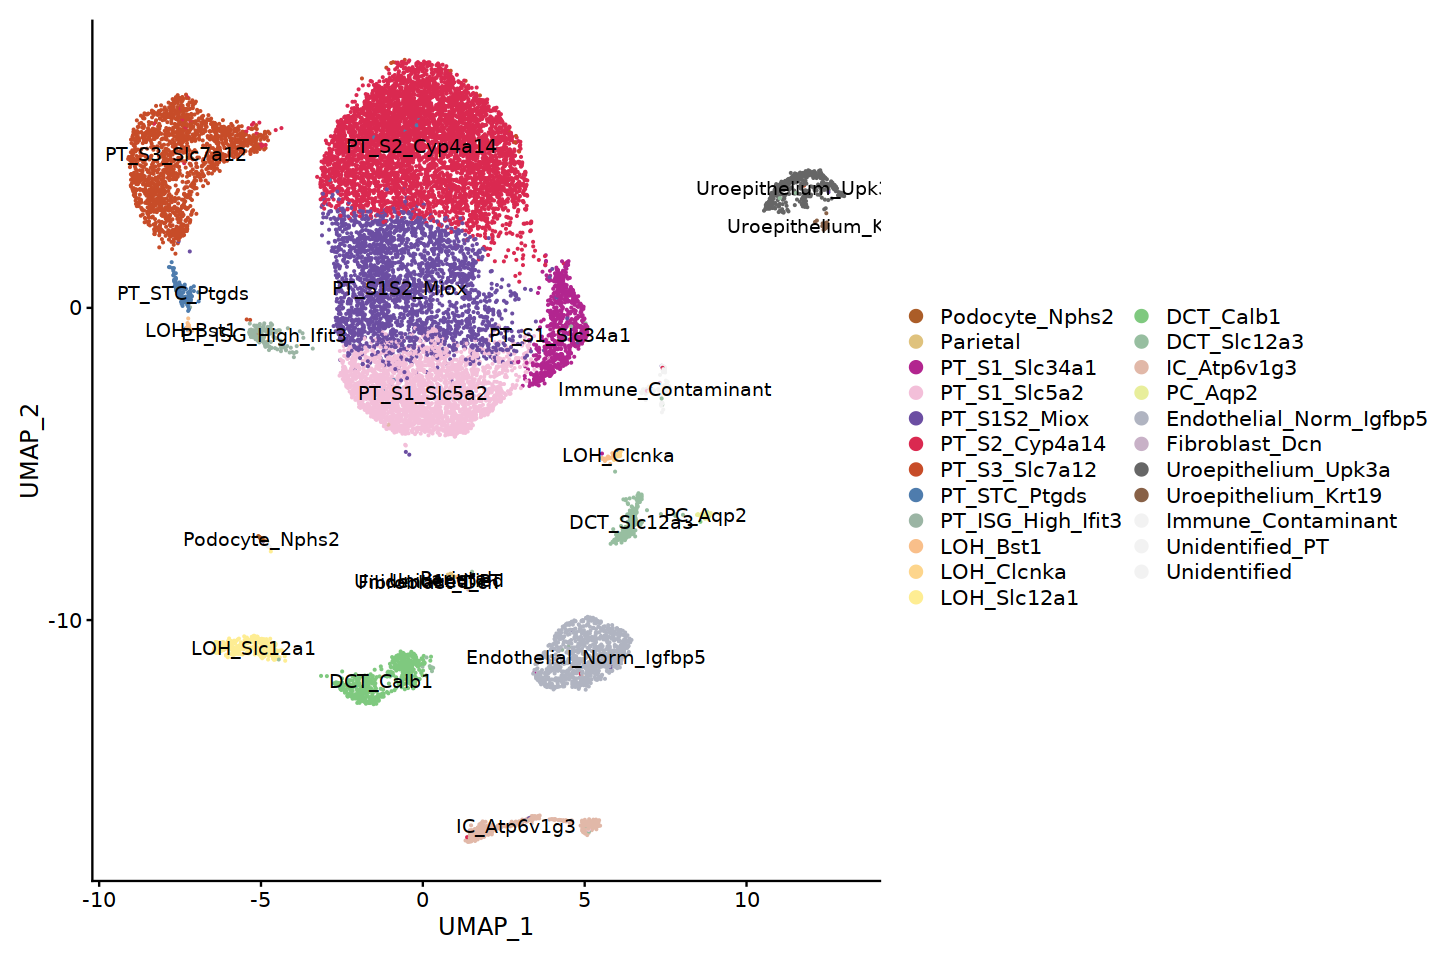

In [40]:
seur_ni_n_ambfilt = readRDS(file = "Manuscript_Objects/NonImmune_NormalKidney_AmbFilt_SeuratObject_Final.RDS")
Idents(seur_ni_n_ambfilt) = "Annot_Granular"
Idents(seur_ni_n_ambfilt) = factor(Idents(seur_ni_n_ambfilt), levels = c("Podocyte_Nphs2","Parietal","PT_S1_Slc34a1","PT_S1_Slc5a2","PT_S1S2_Miox","PT_S2_Cyp4a14", "PT_S3_Slc7a12","PT_STC_Ptgds","PT_ISG_High_Ifit3","LOH_Bst1","LOH_Clcnka","LOH_Slc12a1","DCT_Calb1","DCT_Slc12a3","IC_Atp6v1g3","PC_Aqp2","Endothelial_Norm_Igfbp5","Fibroblast_Dcn","Uroepithelium_Upk3a","Uroepithelium_Krt19","Immune_Contaminant","Unidentified_PT","Unidentified"))
n_colors_new = readRDS("Manuscript_Objects/NormalKidney_NonImmune_Colors_Final.RDS")

options(repr.plot.width=12, repr.plot.height=8)
DimPlot(seur_ni_n_ambfilt, label = T, cols = n_colors_new[as.character(levels(Idents(seur_ni_n_ambfilt)))])

In [41]:
seur_ni_n_ambfilt_sub = subset(seur_ni_n_ambfilt, idents = c("Immune_Contaminant","Unidentified_PT","Unidentified"),invert = T)

In [42]:
Idents(seur_ni_n_ambfilt_sub) = factor(Idents(seur_ni_n_ambfilt_sub), levels = c("Podocyte_Nphs2","Parietal","PT_S1_Slc34a1","PT_S1_Slc5a2","PT_S1S2_Miox","PT_S2_Cyp4a14", "PT_S3_Slc7a12","PT_STC_Ptgds","PT_ISG_High_Ifit3","LOH_Bst1","LOH_Clcnka","LOH_Slc12a1","DCT_Calb1","DCT_Slc12a3","IC_Atp6v1g3","PC_Aqp2","Endothelial_Norm_Igfbp5","Fibroblast_Dcn","Uroepithelium_Upk3a","Uroepithelium_Krt19"))

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,Podocyte_Nphs2,10_VX516_N,0.0004042854
2,Parietal,10_VX516_N,0.0004042854
3,PT_S1_Slc34a1,10_VX516_N,0.0741863756
4,PT_S1_Slc5a2,10_VX516_N,0.1813220133
5,PT_S1S2_Miox,10_VX516_N,0.1417020416


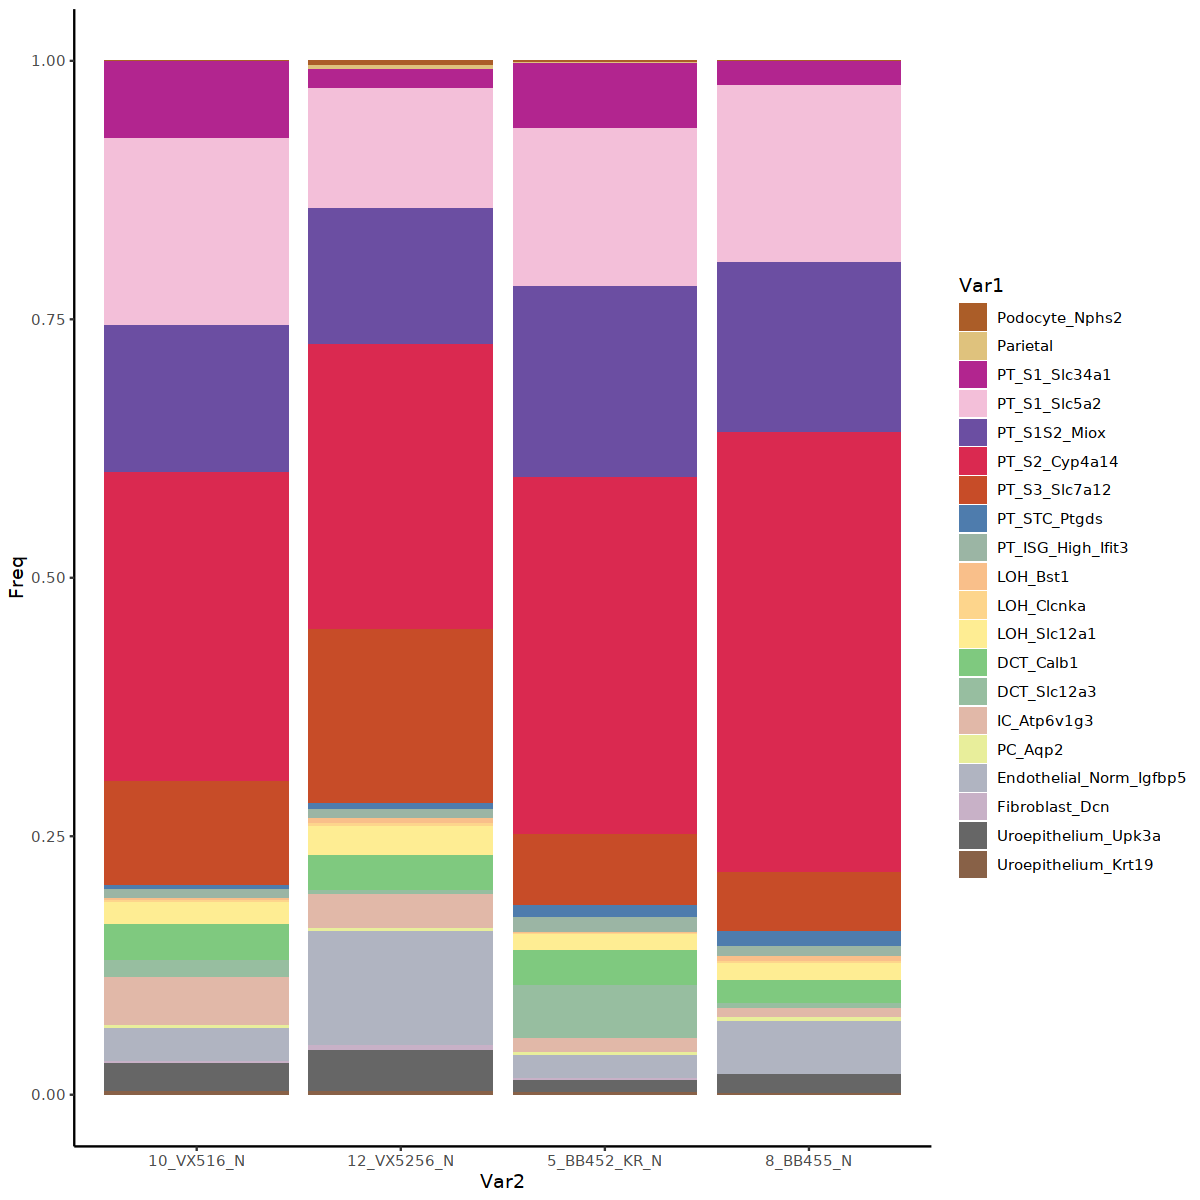

In [43]:
options(repr.plot.width=10, repr.plot.height=10)
props <- prop.table(table(Idents(seur_ni_n_ambfilt_sub),seur_ni_n_ambfilt_sub$Sample), margin = 2)
props <- data.frame(props)
corner(props)
ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") +theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=14),
          axis.text.y = element_text(size=14)) + scale_fill_manual(values = n_colors_new[as.character(levels(Idents(seur_ni_n_ambfilt_sub)))])  + theme_classic()


In [44]:
seur_ni_n_ambfilt_sub

An object of class Seurat 
23871 features across 16464 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

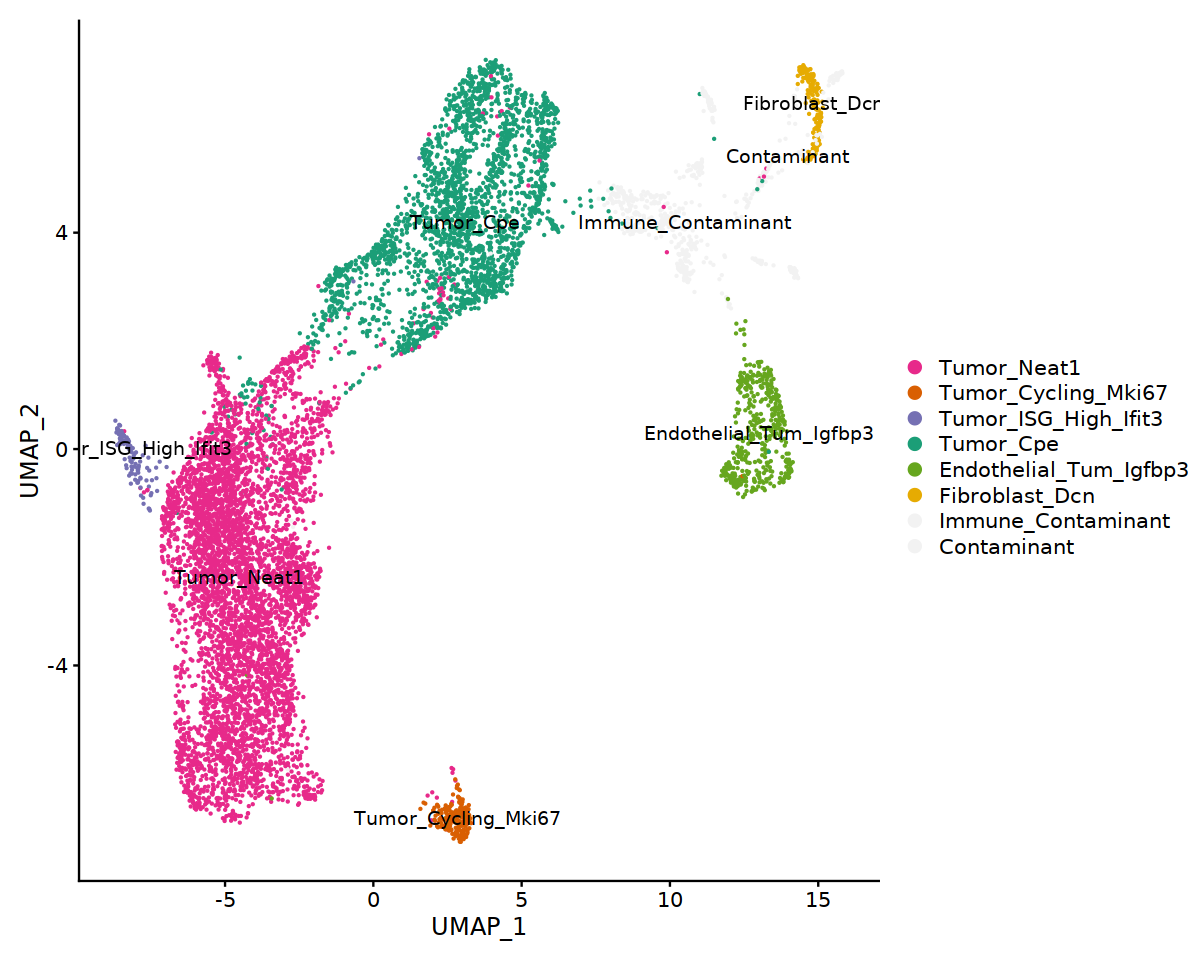

In [45]:
seur_ni_t_ambfilt = readRDS(file = "Manuscript_Objects/NonImmune_Tumor_AmbFilt_SeuratObject.RDS")
t_colors = readRDS("Manuscript_Objects/Tumor_NonImmune_Colors.RDS")
t_colors = replace(t_colors, t_colors == "lightgrey","gray95")

options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seur_ni_t_ambfilt, label = T, cols = t_colors[as.character(levels(Idents(seur_ni_t_ambfilt)))])

In [46]:
seur_ni_t_ambfilt_sub = subset(seur_ni_t_ambfilt, idents = c("Immune_Contaminant","Contaminant"), invert = T)
table(Idents(seur_ni_t_ambfilt_sub))


           Tumor_Neat1    Tumor_Cycling_Mki67   Tumor_ISG_High_Ifit3 
                  5208                    219                    119 
             Tumor_Cpe Endothelial_Tum_Igfbp3         Fibroblast_Dcn 
                  2398                    468                    189 

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,Tumor_Neat1,11_VX5256_T,0.122149837
2,Tumor_Cycling_Mki67,11_VX5256_T,0.000000000
3,Tumor_ISG_High_Ifit3,11_VX5256_T,0.001628664
4,Tumor_Cpe,11_VX5256_T,0.335504886
5,Endothelial_Tum_Igfbp3,11_VX5256_T,0.421824104


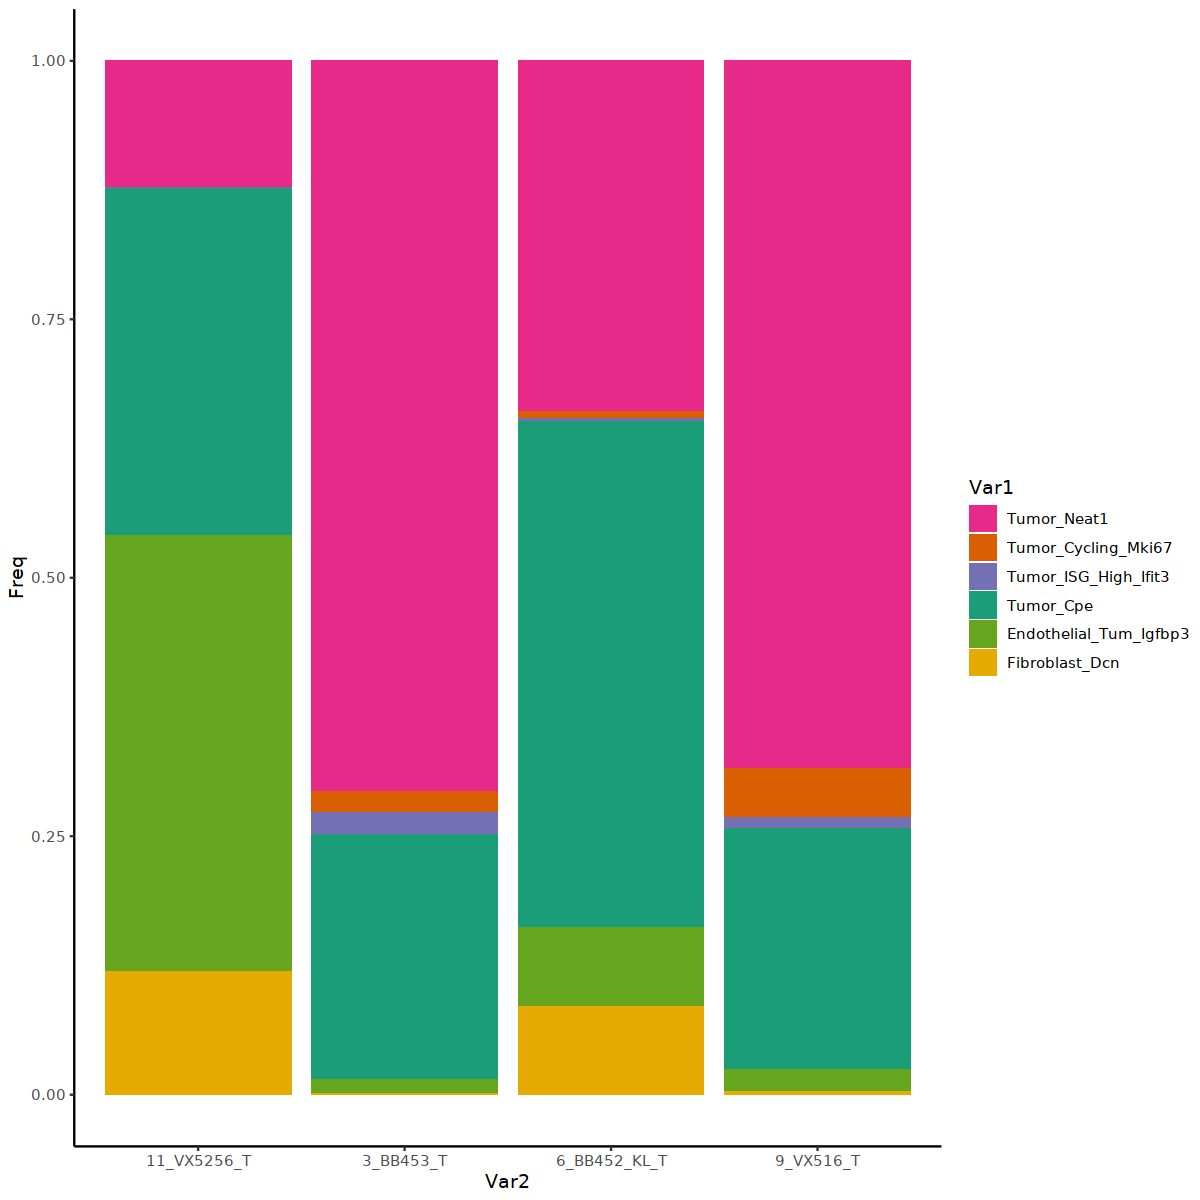

In [47]:
options(repr.plot.width=10, repr.plot.height=10)
props <- prop.table(table(Idents(seur_ni_t_ambfilt_sub),seur_ni_t_ambfilt_sub$Sample), margin = 2)
props <- data.frame(props)
corner(props)
ggplot() + geom_bar(aes(y = Freq, x = Var2, fill = Var1), data = props, stat="identity") +theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=14),
          axis.text.y = element_text(size=14)) + scale_fill_manual(values = t_colors[as.character(levels(Idents(seur_ni_t_ambfilt_sub)))])  + theme_classic()


In [48]:
seur_ni_t_ambfilt_sub

An object of class Seurat 
23871 features across 8601 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

In [49]:
n_samples = unique(seur_ni_n_ambfilt$Sample)
t_samples = unique(seur_ni_t_ambfilt$Sample)
all_samples = c(t_samples, n_samples)
samp_colors = brewer.pal(8, "Set2")
names(samp_colors) = all_samples
samp_colors

saveRDS(samp_colors, file = "Manuscript_Objects/Sample_Colors.RDS")

11_VX5256_T    3_BB453_T 6_BB452_KL_T    9_VX516_T   10_VX516_N  12_VX5256_N 
   "#66C2A5"    "#FC8D62"    "#8DA0CB"    "#E78AC3"    "#A6D854"    "#FFD92F" 
5_BB452_KR_N    8_BB455_N 
   "#E5C494"    "#B3B3B3"

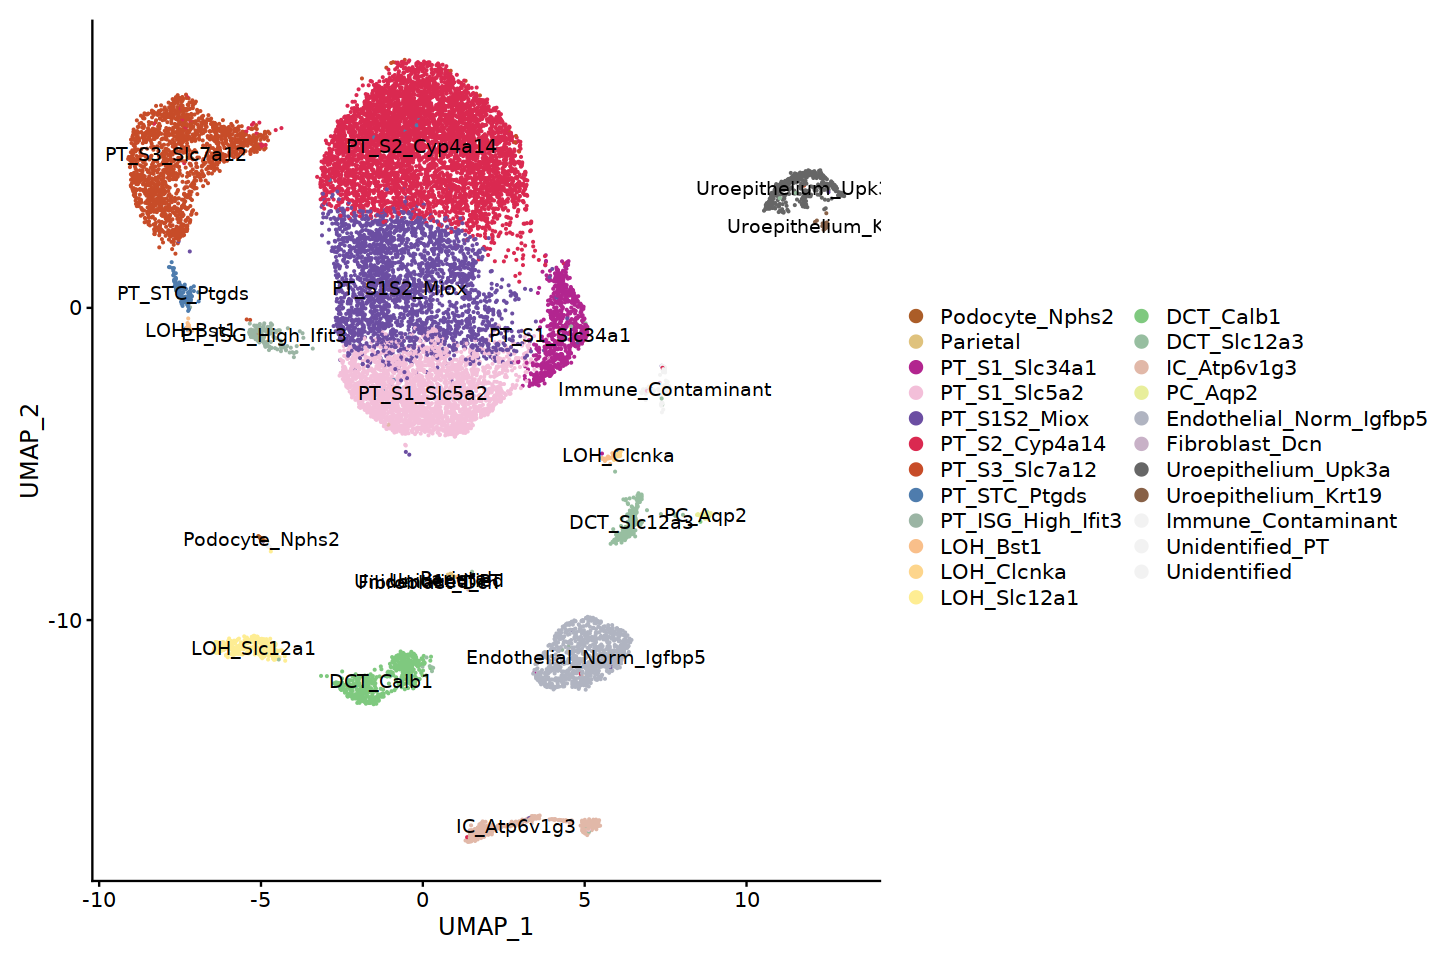

In [50]:
options(repr.plot.width=12, repr.plot.height=8)
DimPlot(seur_ni_n_ambfilt, label = T, cols = n_colors_new[as.character(levels(Idents(seur_ni_n_ambfilt)))])
ggsave("Manuscript_Figures/Normal_Fig_UMAP_CellType_Final.pdf",width = 12, height = 8)

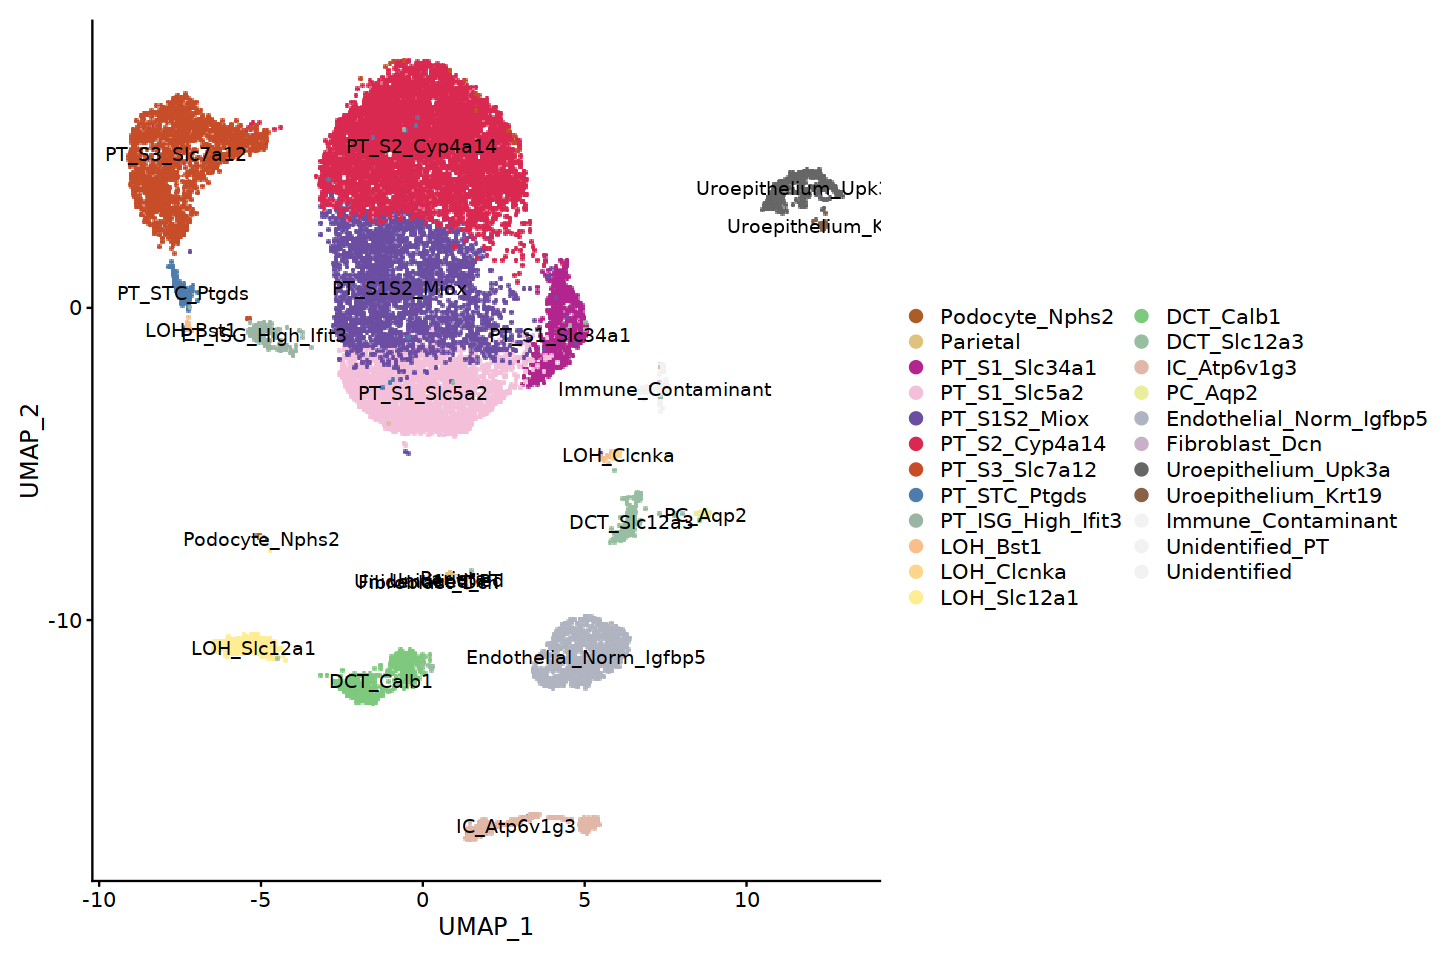

In [51]:
options(repr.plot.width=12, repr.plot.height=8)
DimPlot(seur_ni_n_ambfilt, label = T, cols = n_colors_new[as.character(levels(Idents(seur_ni_n_ambfilt)))],raster = T,order = T)
ggsave("Manuscript_Figures/Normal_Fig_UMAP_CellType_Final_Raster.pdf",width = 12, height = 8)

In [52]:
seur_ni_n_ambfilt_sub

An object of class Seurat 
23871 features across 16464 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

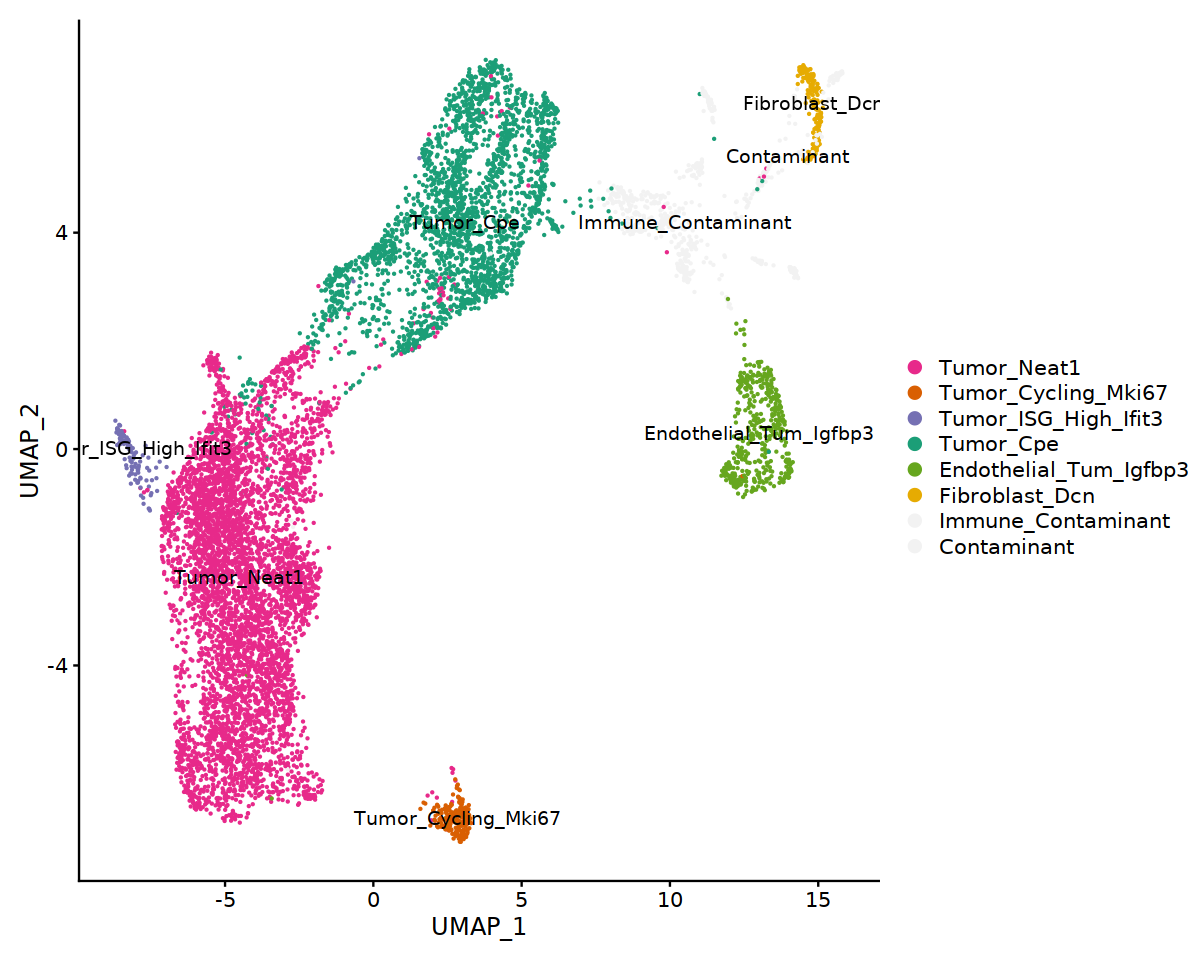

In [53]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seur_ni_t_ambfilt, label = T, cols = t_colors[as.character(levels(Idents(seur_ni_t_ambfilt)))])

ggsave("Manuscript_Figures/Tumor_Fig_UMAP_CellType.pdf",width = 10, height = 8)

### Heatmap for cell of origin analysis (Main Figure 4B) generated using GENE-E

### 2. UMAP of CD8 T cells, galaxy plots of point density of CD8 T cells in normal kidney and tumor (Main Figure 4C)

In [54]:
seur_i = readRDS("Manuscript_Objects/Immune_SeuratObject.RDS")
Idents(seur_i) = "Annot_Imm_1_Cycling_ISG_Resolved_Granular"

Centering and scaling data matrix

PC_ 1 
Positive:  Pclaf, Nusap1, Birc5, Spc24, Top2a, Mki67, Stmn1, Knl1, Hist1h3c, Rrm2 
	   Esco2, Ccna2, Tpx2, Cdca3, Cenpf, Kif11, Hist1h1b, Cdca8, Cdk1, Hmmr 
	   Cks1b, Kif15, Mxd3, Hist1h2ae, Ube2c, Hist1h2ap, Hist1h2ab, Ccnb2, Prc1, Aurkb 
Negative:  Rps18, Rpl13, Rpl23, Rplp1, Rpl32, Rps28, Rps7, Rps8, Rps12, Rpl36a 
	   Gm42418, Ccl5, Rpl15, Rpl23a, Eef1b2, Rpl10, Rps19, Rplp0, Rpsa, Il7r 
	   Cd8b1, Rps26, Rpl41, Rps2, Rps20, Ccr7, Pik3ip1, Ccnd2, Sell, Lef1 
PC_ 2 
Positive:  Klf2, Sell, Ccr7, S1pr1, Lef1, Il7r, Slamf6, Klf3, Dapl1, Cmah 
	   Tcf7, mt-Atp6, Nsg2, Il6ra, Emb, Satb1, mt-Co2, mt-Co3, Atp1b3, Sh3bp5 
	   Actn1, Arl5c, Rplp0, Tdrp, Tsc22d3, Pde2a, Igfbp4, Tmem108, Ripor2, Rasgrp2 
Negative:  Xcl1, Cxcr6, Itga1, Cd3g, Fcer1g, Cd7, Rgs1, Ctsw, AW112010, Itgae 
	   Cd244a, Fgl2, Tyrobp, Gzmb, Cish, Cd160, S100a6, Klrb1a, Isg20, Tcrg-C2 
	   Tnfsf10, AU020206, Car2, Trgv2, Chn2, Bcl2, Jaml, Lat2, Id2, Cited4 
PC_ 3 
Positive:  Ccl5

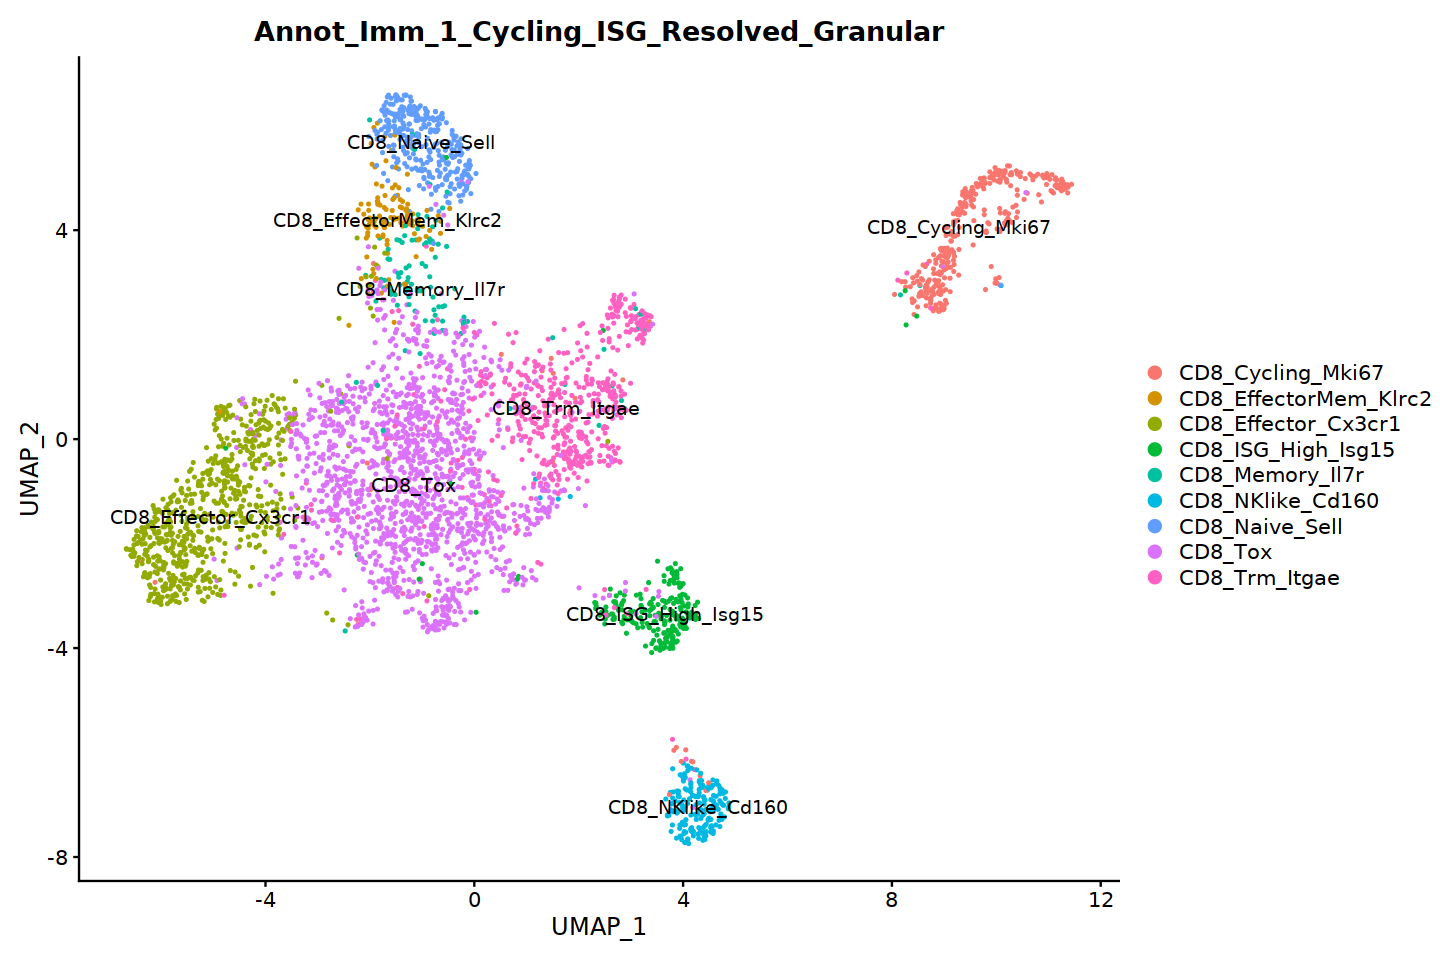

In [55]:
options(repr.plot.width=12, repr.plot.height=8)

seur_cd8_plot = subset(seur_i, idents = c("CD8_Cycling_Mki67","CD8_EffectorMem_Klrc2","CD8_Effector_Cx3cr1","CD8_ISG_High_Isg15","CD8_NKlike_Cd160","CD8_Naive_Sell","CD8_Memory_Il7r","CD8_Tox","CD8_Trm_Itgae"))
seur_cd8_plot <- NormalizeData(seur_cd8_plot)
seur_cd8_plot <- FindVariableFeatures(seur_cd8_plot, selection.method = "vst",nfeatures = 3000)
seur_cd8_plot <- ScaleData(seur_cd8_plot, features = row.names(seur_cd8_plot))
seur_cd8_plot <- RunPCA(seur_cd8_plot, npcs = 30,verbose = T)
seur_cd8_plot <- RunHarmony(seur_cd8_plot, group.by.vars = "Sample")
seur_cd8_plot <- RunUMAP(seur_cd8_plot, reduction = "harmony", dims = 1:30)
#seur_cd8_plot <- FindNeighbors(seur_cd8_plot, reduction = "harmony", dims = 1:30)
#seur_cd8_plot <- FindClusters(seur_cd8_plot, resolution = 0.5)
DimPlot(seur_cd8_plot, label = T, group.by = "Annot_Imm_1_Cycling_ISG_Resolved_Granular")

In [56]:
table(Idents(seur_cd8_plot))


    CD8_Cycling_Mki67 CD8_EffectorMem_Klrc2   CD8_Effector_Cx3cr1 
                  345                   115                   657 
   CD8_ISG_High_Isg15       CD8_Memory_Il7r      CD8_NKlike_Cd160 
                  235                   101                   190 
       CD8_Naive_Sell               CD8_Tox         CD8_Trm_Itgae 
                  314                  1492                   551 

In [57]:
Idents(seur_cd8_plot) = factor(Idents(seur_cd8_plot), levels = c("CD8_Effector_Cx3cr1","CD8_Tox","CD8_ISG_High_Isg15","CD8_Trm_Itgae","CD8_NKlike_Cd160","CD8_Cycling_Mki67","CD8_Memory_Il7r","CD8_EffectorMem_Klrc2","CD8_Naive_Sell"))


CD8_Effector_Cx3cr1               CD8_Tox    CD8_ISG_High_Isg15 
            "#CBEAB3"             "#58BEC0"             "#EF771C" 
        CD8_Trm_Itgae      CD8_NKlike_Cd160     CD8_Cycling_Mki67 
          "#E7695DFF"             "#BB4660"             "#BF91A8" 
      CD8_Memory_Il7r CD8_EffectorMem_Klrc2        CD8_Naive_Sell 
            "#1E7DB7"             "#7DAD32"             "#081D58"

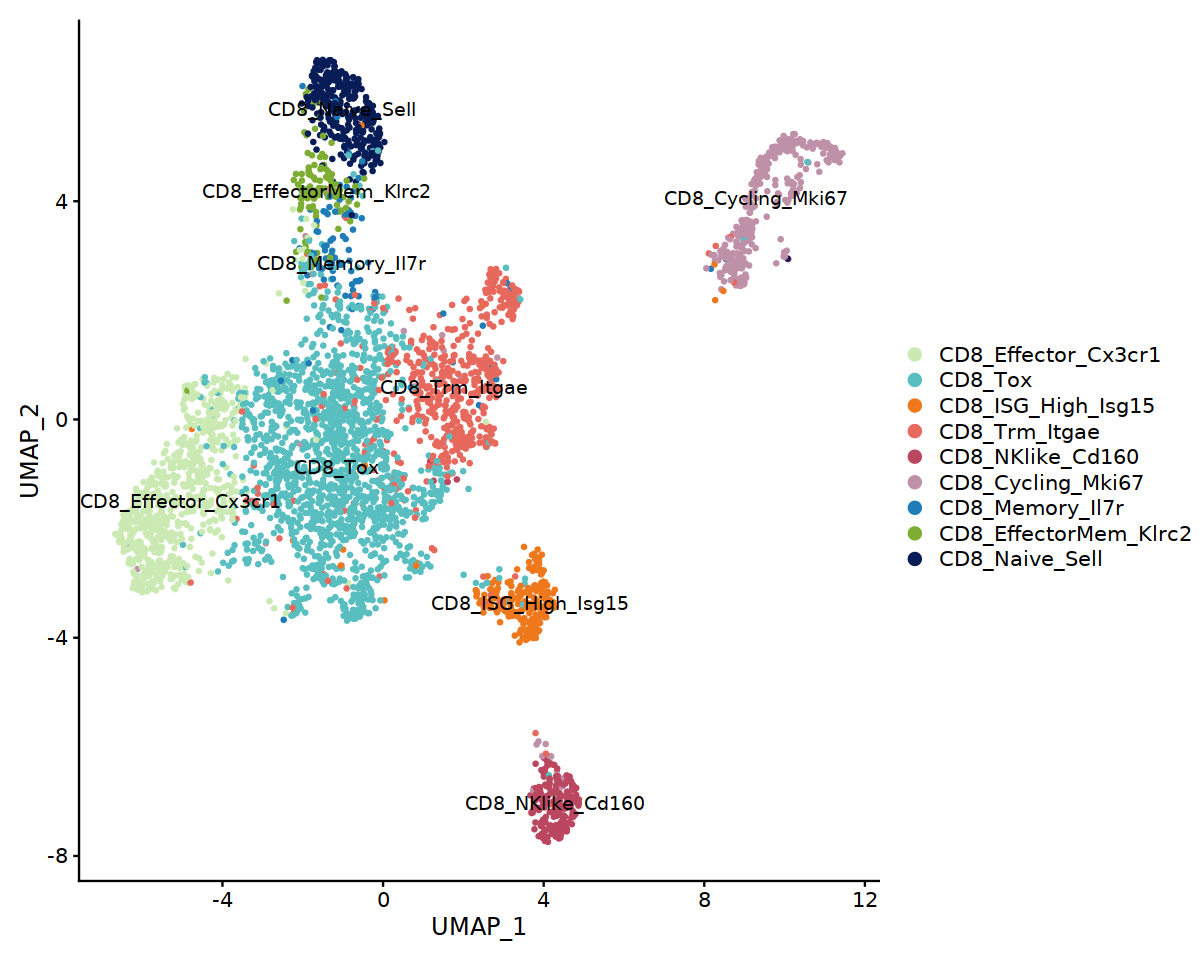

In [58]:
mycols = c(colorRampPalette(brewer.pal(9,"YlGnBu")[2:9])(9))
names(mycols) = as.character(levels(Idents(seur_cd8_plot)))

mycols["CD8_Effector_Cx3cr1"] = "#CBEAB3"
mycols["CD8_Tox"] = "#58BEC0"
mycols["CD8_Trm_Itgae"] = "#E7695DFF"
mycols["CD8_ISG_High_Isg15"] = "#EF771C"
mycols["CD8_NKlike_Cd160"] = "#BB4660"
mycols["CD8_Cycling_Mki67"] = "#BF91A8"
mycols["CD8_EffectorMem_Klrc2"] = "#7DAD32"
mycols["CD8_Memory_Il7r"] = "#1E7DB7"

mycols

options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seur_cd8_plot, label = T, cols = mycols,pt.size = 0.8)

ggsave("Manuscript_Figures/CD8_Fig_UMAP_CellType.pdf", width = 10, height = 8)

In [59]:
table(seur_cd8_plot$TumorNormal)


Normal  Tumor 
   610   3390 

In [60]:
seur_cd8_plot

An object of class Seurat 
23871 features across 4000 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

,UMAP_1,UMAP_2,CellType,TumorNormal,barcode
,<dbl>,<dbl>,<fct>,<chr>,<chr>
Sample.10_VX516_N.AGTTCGAAGCCACTCG-1,9.1685007,3.579144,CD8_Cycling_Mki67,Normal,Sample.10_VX516_N.AGTTCGAAGCCACTCG-1
Sample.10_VX516_N.ATACCTTCAATTCACG-1,-1.9148302,4.091686,CD8_EffectorMem_Klrc2,Normal,Sample.10_VX516_N.ATACCTTCAATTCACG-1
Sample.10_VX516_N.TCGTGGGTCTCGTCGT-1,10.2518576,5.228774,CD8_Cycling_Mki67,Normal,Sample.10_VX516_N.TCGTGGGTCTCGTCGT-1
Sample.10_VX516_N.CTGCCTATCACTGAAC-1,11.0262974,4.972667,CD8_Cycling_Mki67,Normal,Sample.10_VX516_N.CTGCCTATCACTGAAC-1
Sample.10_VX516_N.TCGAACACAGCCCACA-1,-0.5087609,4.535325,CD8_Naive_Sell,Normal,Sample.10_VX516_N.TCGAACACAGCCCACA-1


Warning message:
"Removed 396 rows containing missing values (geom_raster)."
Warning message:
"Removed 396 rows containing missing values (geom_raster)."


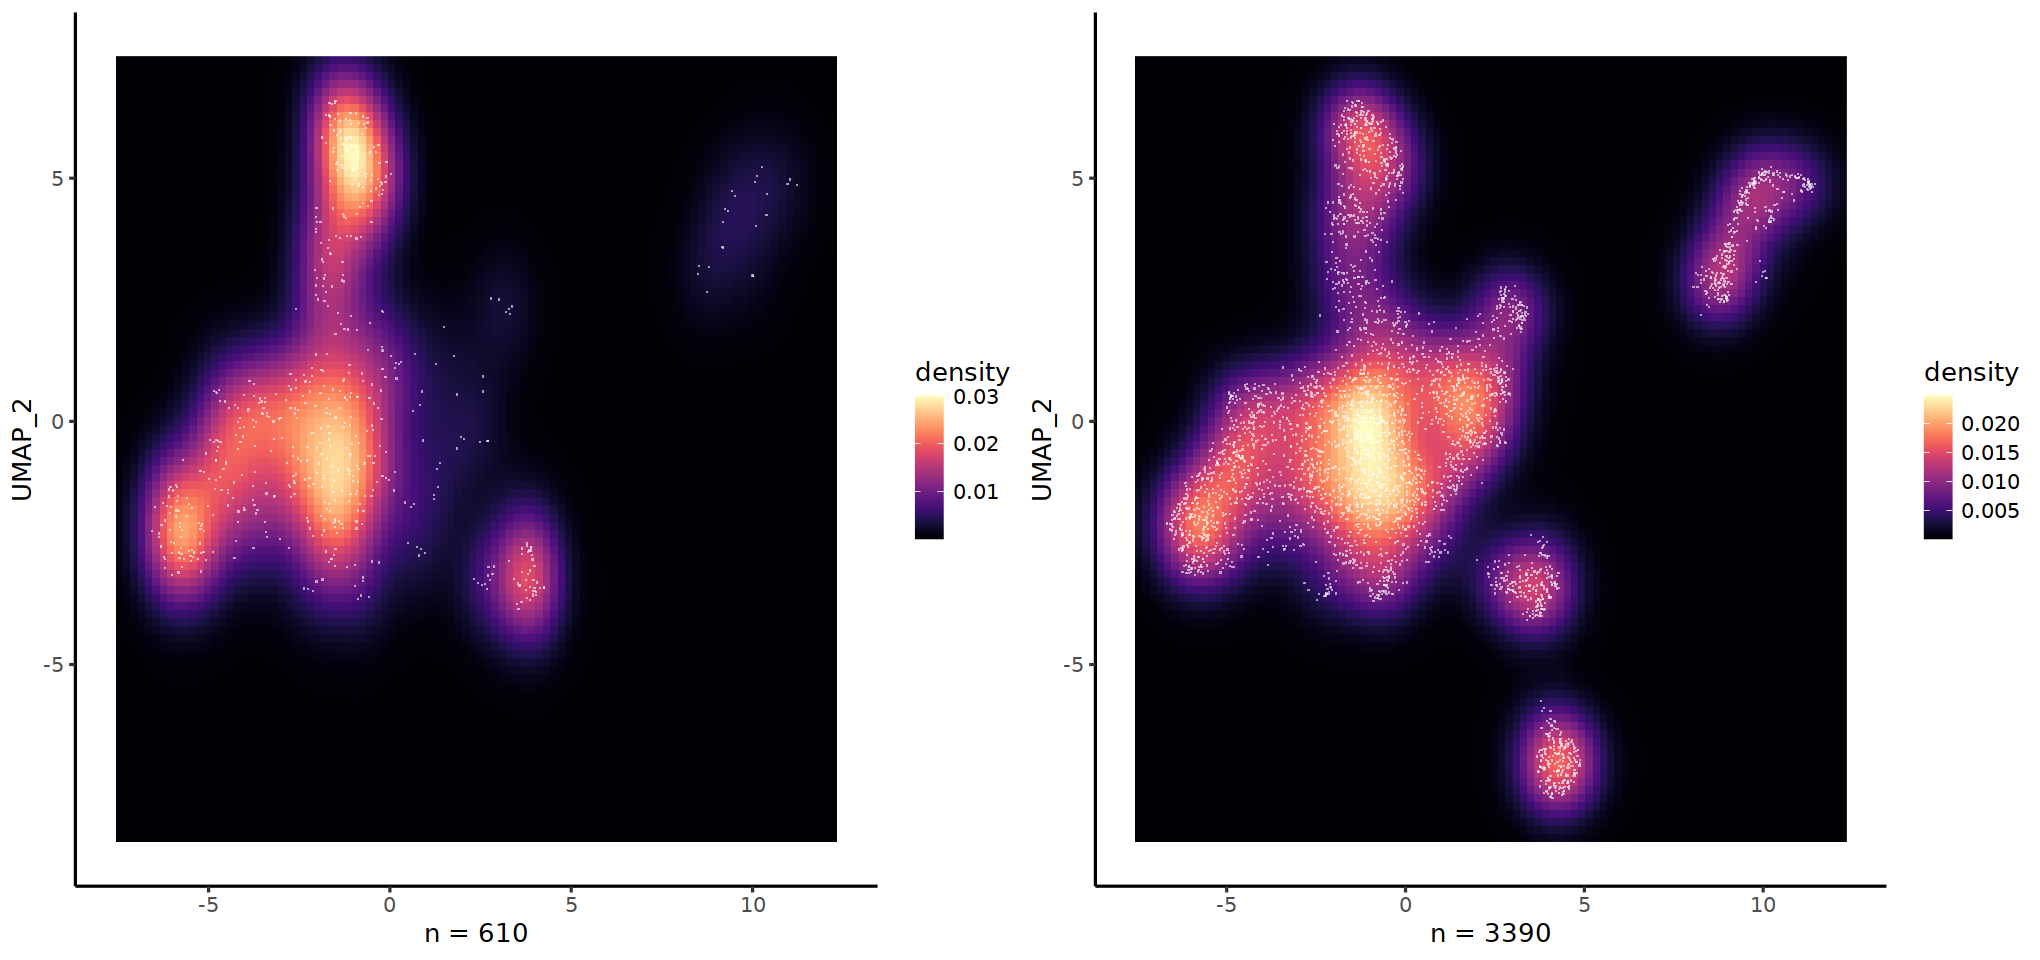

In [61]:
df = data.frame(seur_cd8_plot@reductions$umap@cell.embeddings)
df$CellType = seur_cd8_plot$Annot_Imm_1_Cycling_ISG_Resolved_Granular
df$TumorNormal = seur_cd8_plot$TumorNormal
df$barcode = row.names(df)
corner(df)

UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

one = ggplot(subset(df,TumorNormal == "Normal"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
scale_fill_viridis(option = "magma") +
geom_point(shape = ".",col = "white", alpha = 0.6) +
 xlab(paste("n = ",nrow(subset(df,TumorNormal == "Normal")),sep = "")) +
theme_classic(base_size = 15)


UMAP_1 = df$UMAP_1
UMAP_2 = df$UMAP_2

two = ggplot(subset(df,TumorNormal == "Tumor"), aes(UMAP_1, UMAP_2)) +
stat_density_2d(aes(fill = ..density..), geom = 'raster', contour = FALSE) +
scale_fill_viridis(option = "magma") +
#coord_cartesian(expand = FALSE, xlim = c(min(UMAP_1), max(UMAP_1)),ylim = c(min(UMAP_2),max(UMAP_2))) +
xlim(c(min(UMAP_1)-1, max(UMAP_1)+1)) +
ylim(c(min(UMAP_2)-1, max(UMAP_2)+1)) +
geom_point(shape = ".",col = "white", alpha = 0.6) + 
xlab(paste("n = ",nrow(subset(df,TumorNormal == "Tumor")),sep = "")) +
theme_classic(base_size = 15)

options(repr.plot.width=17, repr.plot.height=8)
ggarrange(one, two)

ggsave("Manuscript_Figures/CD8_Galaxies_Final.pdf", width = 17, height = 8)

### 3. Tumor vs normal kidney proportion analysis for CD8 T cells (Main Figure 4D)

In [62]:
totals = as.vector(table(seur_cd8_plot$Sample))
names(totals) = names(table(seur_cd8_plot$Sample))
totals

meta_broad = seur_cd8_plot@meta.data
head(meta_broad)

samples = names(totals)
samples

target = meta_broad

res = list()

for (i in 1:length(samples)){
    sub = subset(target, Sample == samples[i])
    sub_table = table(sub$Annot_Imm_1_Cycling_ISG_Resolved_Granular)
    sub_table = as.vector(sub_table)
    names(sub_table) = names(table(sub$Annot_Imm_1_Cycling_ISG_Resolved_Granular))
    sub_table = sub_table/(totals[i])
    res[[i]] = sub_table*100
}

names(res) = samples
res_df = as.data.frame(res,check.names = F)
res_df = res_df[c("CD8_Effector_Cx3cr1","CD8_Tox","CD8_ISG_High_Isg15","CD8_Trm_Itgae","CD8_NKlike_Cd160","CD8_Cycling_Mki67","CD8_Memory_Il7r","CD8_EffectorMem_Klrc2","CD8_Naive_Sell"),]
res_df

10_VX516_N  11_VX5256_T  12_VX5256_N    3_BB453_T 5_BB452_KR_N 6_BB452_KL_T 
         123         2503          300          144           64          620 
   8_BB455_N    9_VX516_T 
         123          123

,orig.ident,nCount_RNA,nFeature_RNA,Sample,cell_id,percent.mt,TumorNormal,Sex,Helicobacter,RNA_snn_res.0.5,seurat_clusters,Annot1,RNA_snn_res.0.6,Annot_Imm_1,Annot_Imm_1_Cycling_ISG_Resolved,Annot_Imm_1_Cycling_ISG_Resolved_Granular,Immune_Broad_CellType
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Sample.10_VX516_N.AGTTCGAAGCCACTCG-1,Sample.10,11886,3335,10_VX516_N,Sample.10_VX516_N.AGTTCGAAGCCACTCG-1,1.219923,Normal,Female,neg,15,17,29,17,Tcell_Cycling_Mki67,CD8_Cycling,CD8_Cycling_Mki67,CD8_T_cell
Sample.10_VX516_N.ATACCTTCAATTCACG-1,Sample.10,9390,2246,10_VX516_N,Sample.10_VX516_N.ATACCTTCAATTCACG-1,4.494143,Normal,Female,neg,7,6,3,6,Memory_TH_Il7r,Memory_TH_Il7r,CD8_EffectorMem_Klrc2,CD8_T_cell
Sample.10_VX516_N.TCGTGGGTCTCGTCGT-1,Sample.10,8488,2653,10_VX516_N,Sample.10_VX516_N.TCGTGGGTCTCGTCGT-1,1.743638,Normal,Female,neg,15,17,29,17,Tcell_Cycling_Mki67,CD8_Cycling,CD8_Cycling_Mki67,CD8_T_cell
Sample.10_VX516_N.CTGCCTATCACTGAAC-1,Sample.10,8108,2589,10_VX516_N,Sample.10_VX516_N.CTGCCTATCACTGAAC-1,2.503700,Normal,Female,neg,15,17,29,17,Tcell_Cycling_Mki67,CD8_Cycling,CD8_Cycling_Mki67,CD8_T_cell
Sample.10_VX516_N.TCGAACACAGCCCACA-1,Sample.10,7839,1672,10_VX516_N,Sample.10_VX516_N.TCGAACACAGCCCACA-1,1.186376,Normal,Female,neg,7,6,3,6,Memory_TH_Il7r,Memory_TH_Il7r,CD8_Naive_Sell,CD8_T_cell
Sample.10_VX516_N.AAACGCTAGGTAGGCT-1,Sample.10,7405,1953,10_VX516_N,Sample.10_VX516_N.AAACGCTAGGTAGGCT-1,1.850101,Normal,Female,neg,7,6,3,6,Memory_TH_Il7r,Memory_TH_Il7r,CD8_Naive_Sell,CD8_T_cell


[1] "10_VX516_N"   "11_VX5256_T"  "12_VX5256_N"  "3_BB453_T"    "5_BB452_KR_N"
[6] "6_BB452_KL_T" "8_BB455_N"    "9_VX516_T"

,10_VX516_N,11_VX5256_T,12_VX5256_N,3_BB453_T,5_BB452_KR_N,6_BB452_KL_T,8_BB455_N,9_VX516_T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD8_Effector_Cx3cr1,26.016260,17.538953,24.000000,6.250000,9.3750,9.516129,23.577236,8.9430894
CD8_Tox,35.772358,35.637235,41.666667,29.166667,42.1875,42.580645,41.463415,38.2113821
CD8_ISG_High_Isg15,8.943089,5.553336,9.333333,10.416667,6.2500,4.193548,6.504065,3.2520325
CD8_Trm_Itgae,4.878049,16.300439,7.000000,14.583333,4.6875,12.258065,3.252033,9.7560976
CD8_NKlike_Cd160,0.000000,6.272473,0.000000,6.944444,0.0000,2.580645,0.000000,5.6910569
CD8_Cycling_Mki67,4.878049,7.670795,2.000000,24.305556,3.1250,10.967742,6.504065,22.7642276
CD8_Memory_Il7r,1.626016,2.477028,3.000000,2.083333,6.2500,2.096774,5.691057,0.8130081
CD8_EffectorMem_Klrc2,3.252033,2.317219,2.000000,4.166667,1.5625,5.645161,1.626016,2.4390244
CD8_Naive_Sell,14.634146,6.232521,11.000000,2.083333,26.5625,10.161290,11.382114,8.1300813


In [63]:
library(reshape2)

In [64]:
res_df = data.frame(t(res_df), check.names = F)
res_df$TumorNormal = c("Normal","Tumor","Normal","Tumor","Normal","Tumor","Normal","Tumor")
res_df$Sample = row.names(res_df)
res_df

res_df_melt = melt(res_df)

Helicobacter = c("5_BB452_KR_N","6_BB452_KL_T","8_BB455_N","3_BB453_T")

res_df_melt = mutate(res_df_melt, Helicobacter = ifelse(Sample %in% Helicobacter, "pos","neg"))
head(res_df_melt)

,CD8_Effector_Cx3cr1,CD8_Tox,CD8_ISG_High_Isg15,CD8_Trm_Itgae,CD8_NKlike_Cd160,CD8_Cycling_Mki67,CD8_Memory_Il7r,CD8_EffectorMem_Klrc2,CD8_Naive_Sell,TumorNormal,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
10_VX516_N,26.016260,35.77236,8.943089,4.878049,0.000000,4.878049,1.6260163,3.252033,14.634146,Normal,10_VX516_N
11_VX5256_T,17.538953,35.63724,5.553336,16.300439,6.272473,7.670795,2.4770276,2.317219,6.232521,Tumor,11_VX5256_T
12_VX5256_N,24.000000,41.66667,9.333333,7.000000,0.000000,2.000000,3.0000000,2.000000,11.000000,Normal,12_VX5256_N
3_BB453_T,6.250000,29.16667,10.416667,14.583333,6.944444,24.305556,2.0833333,4.166667,2.083333,Tumor,3_BB453_T
5_BB452_KR_N,9.375000,42.18750,6.250000,4.687500,0.000000,3.125000,6.2500000,1.562500,26.562500,Normal,5_BB452_KR_N
6_BB452_KL_T,9.516129,42.58065,4.193548,12.258065,2.580645,10.967742,2.0967742,5.645161,10.161290,Tumor,6_BB452_KL_T
8_BB455_N,23.577236,41.46341,6.504065,3.252033,0.000000,6.504065,5.6910569,1.626016,11.382114,Normal,8_BB455_N
9_VX516_T,8.943089,38.21138,3.252033,9.756098,5.691057,22.764228,0.8130081,2.439024,8.130081,Tumor,9_VX516_T


Using TumorNormal, Sample as id variables



,TumorNormal,Sample,variable,value,Helicobacter
,<chr>,<chr>,<fct>,<dbl>,<chr>
1,Normal,10_VX516_N,CD8_Effector_Cx3cr1,26.016260,neg
2,Tumor,11_VX5256_T,CD8_Effector_Cx3cr1,17.538953,neg
3,Normal,12_VX5256_N,CD8_Effector_Cx3cr1,24.000000,neg
4,Tumor,3_BB453_T,CD8_Effector_Cx3cr1,6.250000,pos
5,Normal,5_BB452_KR_N,CD8_Effector_Cx3cr1,9.375000,pos
6,Tumor,6_BB452_KL_T,CD8_Effector_Cx3cr1,9.516129,pos


In [65]:
unique(res_df_melt$variable)

[1] CD8_Effector_Cx3cr1   CD8_Tox               CD8_ISG_High_Isg15   
[4] CD8_Trm_Itgae         CD8_NKlike_Cd160      CD8_Cycling_Mki67    
[7] CD8_Memory_Il7r       CD8_EffectorMem_Klrc2 CD8_Naive_Sell       
9 Levels: CD8_Effector_Cx3cr1 CD8_Tox CD8_ISG_High_Isg15 ... CD8_Naive_Sell

In [66]:
res_df_melt$variable = factor(res_df_melt$variable, levels = c("CD8_Naive_Sell","CD8_Memory_Il7r","CD8_EffectorMem_Klrc2","CD8_Effector_Cx3cr1","CD8_Tox","CD8_ISG_High_Isg15","CD8_Trm_Itgae","CD8_NKlike_Cd160","CD8_Cycling_Mki67"))



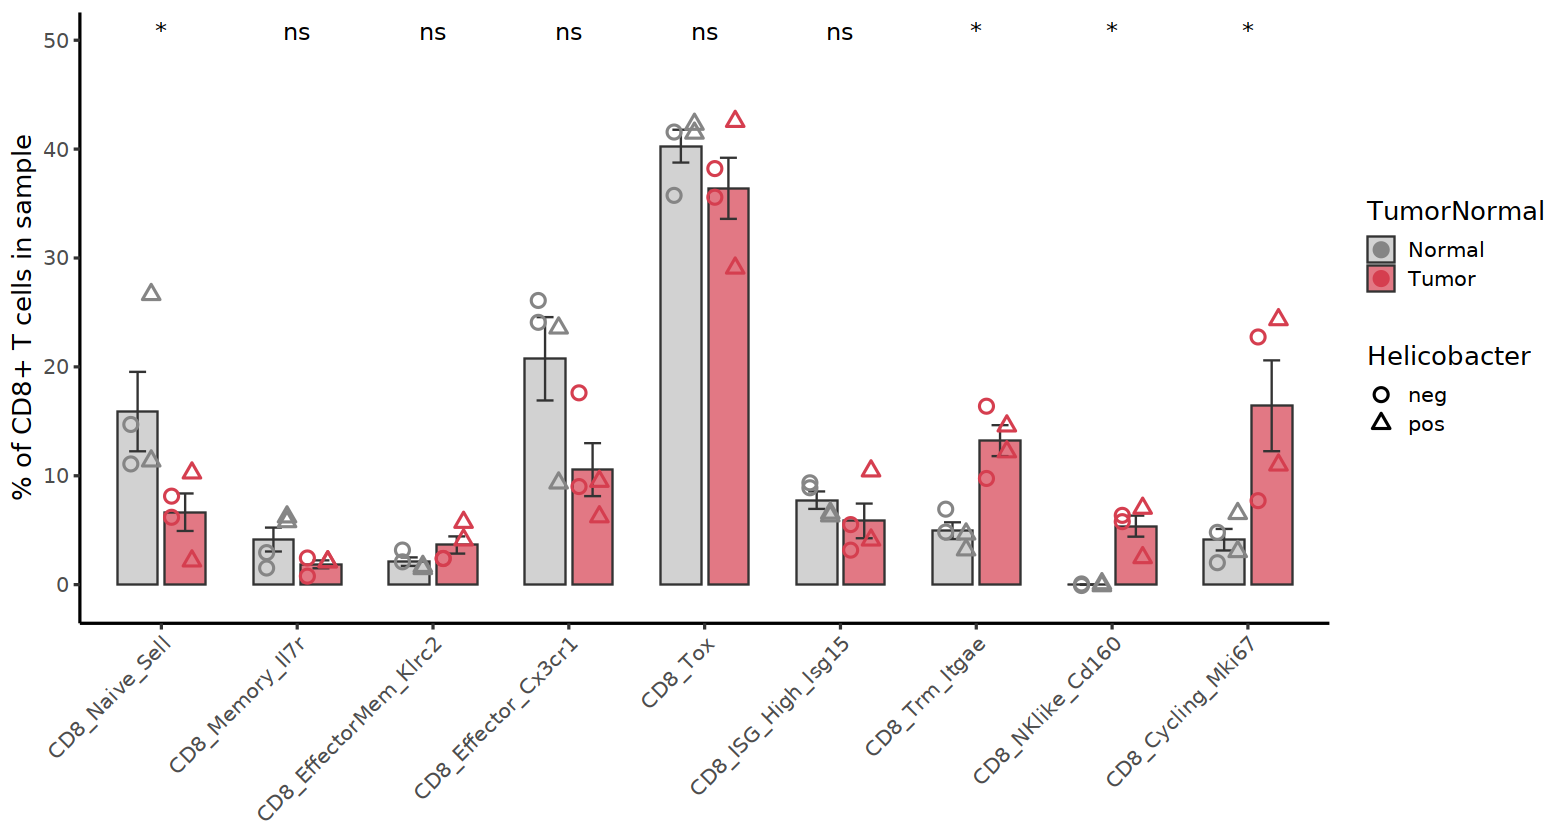

In [67]:
options(repr.plot.width=13, repr.plot.height=7)

ggbarplot(res_df_melt, x = "variable", y = "value",fill = "TumorNormal",
               add = c("mean_se"),add.params = list(width = 0.25),width = 0.6,alpha = 0.7,color = "grey20",
               position = position_dodge(0.7)) +
scale_fill_manual(values = c("gray","#d53e4f")) +
geom_jitter(aes(variable, value, fill = TumorNormal,color = TumorNormal,shape = Helicobacter),  size = 3,stroke = 1, position = position_jitterdodge(jitter.height = .1, jitter.width = 0,dodge.width = 0.6)) +
scale_color_manual(values = c("gray52","#d53e4f")) + theme_classic(base_size = 15) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
scale_shape_manual(values = c(1,2)) +
ylab("% of CD8+ T cells in sample") + xlab(label = NULL) +
ylim(c(-1,50)) +
stat_compare_means(aes(group = TumorNormal), label = "p.signif",size = 5)

ggsave("Manuscript_Figures/CD8_Frequency_Barplots_WithSignif_Helicobacter_Doc.pdf", width = 13, height = 7)

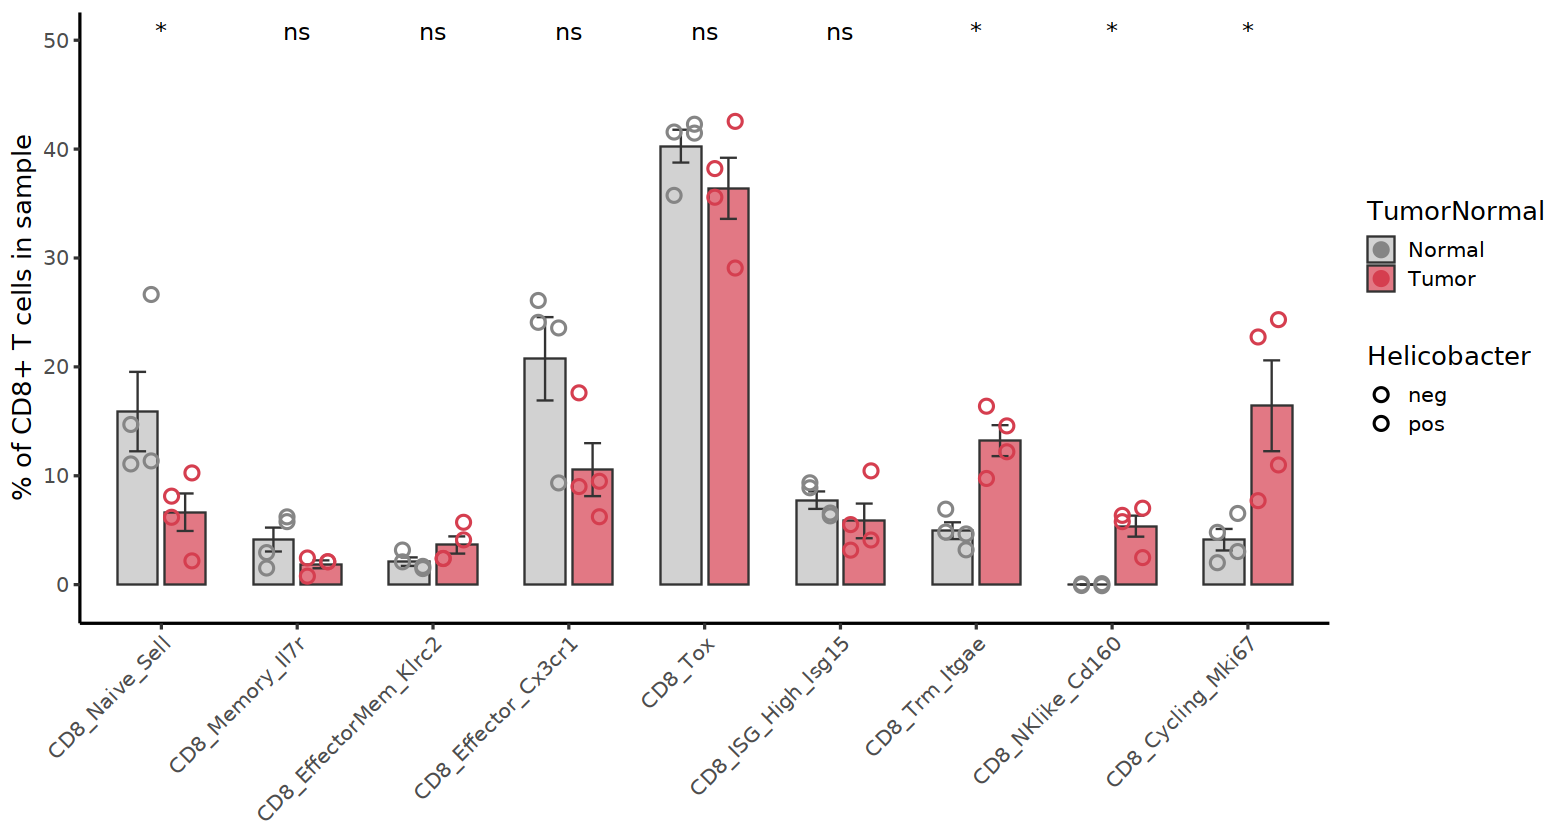

In [68]:
options(repr.plot.width=13, repr.plot.height=7)

ggbarplot(res_df_melt, x = "variable", y = "value",fill = "TumorNormal",
               add = c("mean_se"),add.params = list(width = 0.25),width = 0.6,alpha = 0.7,color = "grey20",
               position = position_dodge(0.7)) +
scale_fill_manual(values = c("gray","#d53e4f")) +
geom_jitter(aes(variable, value, fill = TumorNormal,color = TumorNormal,shape = Helicobacter),  size = 3,stroke = 1, position = position_jitterdodge(jitter.height = .1, jitter.width = 0,dodge.width = 0.6)) +
scale_color_manual(values = c("gray52","#d53e4f")) + theme_classic(base_size = 15) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
scale_shape_manual(values = c(1,1)) +
ylab("% of CD8+ T cells in sample") + xlab(label = NULL) +
ylim(c(-1,50)) +
stat_compare_means(aes(group = TumorNormal), label = "p.signif",size = 5)

ggsave("Manuscript_Figures/CD8_Frequency_Barplots_WithSignif_NoHelicobacter_Doc.pdf", width = 13, height = 7)

### 4. Violin plots of phenotypic markers in CD8 Tox-Hi cells between normal kidney and tumor samples (Main Figure 4E)

In [69]:
seur_cd8_tox = subset(seur_cd8_plot, idents = c("CD8_Tox"))
Idents(seur_cd8_tox) = "TumorNormal"

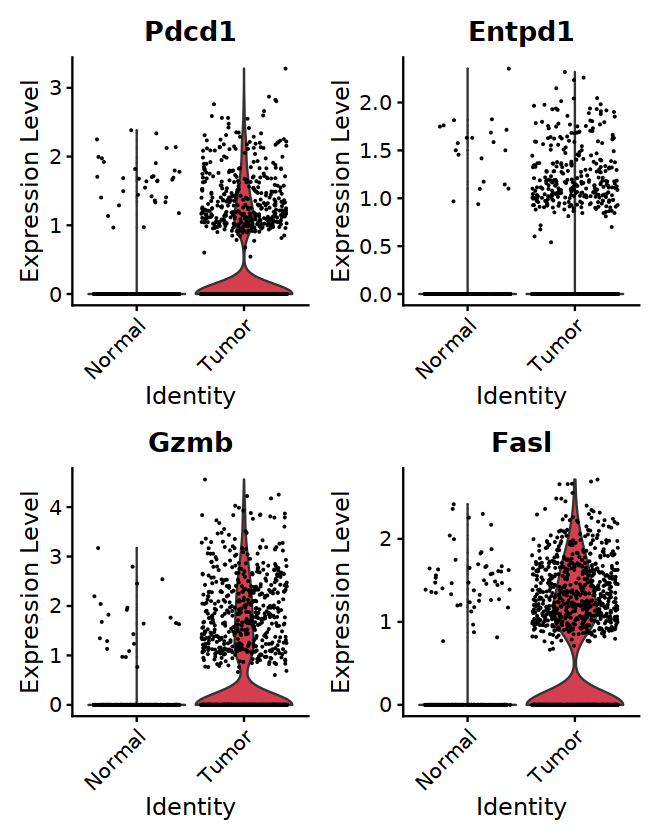

In [70]:
options(repr.plot.width=5.5, repr.plot.height=7)

VlnPlot(seur_cd8_tox, features = c("Pdcd1","Entpd1","Gzmb","Fasl"),group.by = "TumorNormal", ncol = 2, cols = c("grey","#d53e4f"))

ggsave("Manuscript_Figures/CD8_Fig_Violins_Doc.pdf",width = 5.5, height = 7)

In [71]:
de_cd8_tox = FindMarkers(seur_cd8_tox, `ident.1` = "Tumor", `ident.2` = "Normal", logfc.threshold = 0,min.pct = 0,min.diff.pct = 0,test.use = "LR",latent.vars = "Helicobacter")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [72]:
de_cd8_tox[c("Pdcd1","Entpd1","Gzmb","Fasl"),]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pdcd1,8.051115e-07,0.3746956,0.317,0.146,1.921882e-02
Entpd1,3.791882e-07,0.3402310,0.249,0.085,9.051603e-03
Gzmb,7.214278e-24,1.5976049,0.406,0.093,1.722120e-19
Fasl,3.548947e-15,0.5786664,0.530,0.219,8.471690e-11


In [73]:
1.921882e-02

[1] 0.01921882

In [74]:
9.051603e-03

[1] 0.009051603